In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('data.csv')

In [65]:
df.shape

(569, 33)

In [66]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [67]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [69]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal

In [70]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [71]:
missing_values_after = df.isnull().sum()
print("Missing values after dropping:\n", missing_values_after)

Missing values after dropping:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [72]:
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [73]:
# id column is unnecessary for data analysis of breast cancer so drop "id"
df.drop(['id'],axis=1,inplace=True)

In [74]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [75]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [76]:
df.diagnosis=[1 if each=="M" else 0 for each in df.diagnosis]

In [77]:
df.loc[:,"diagnosis"]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [78]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


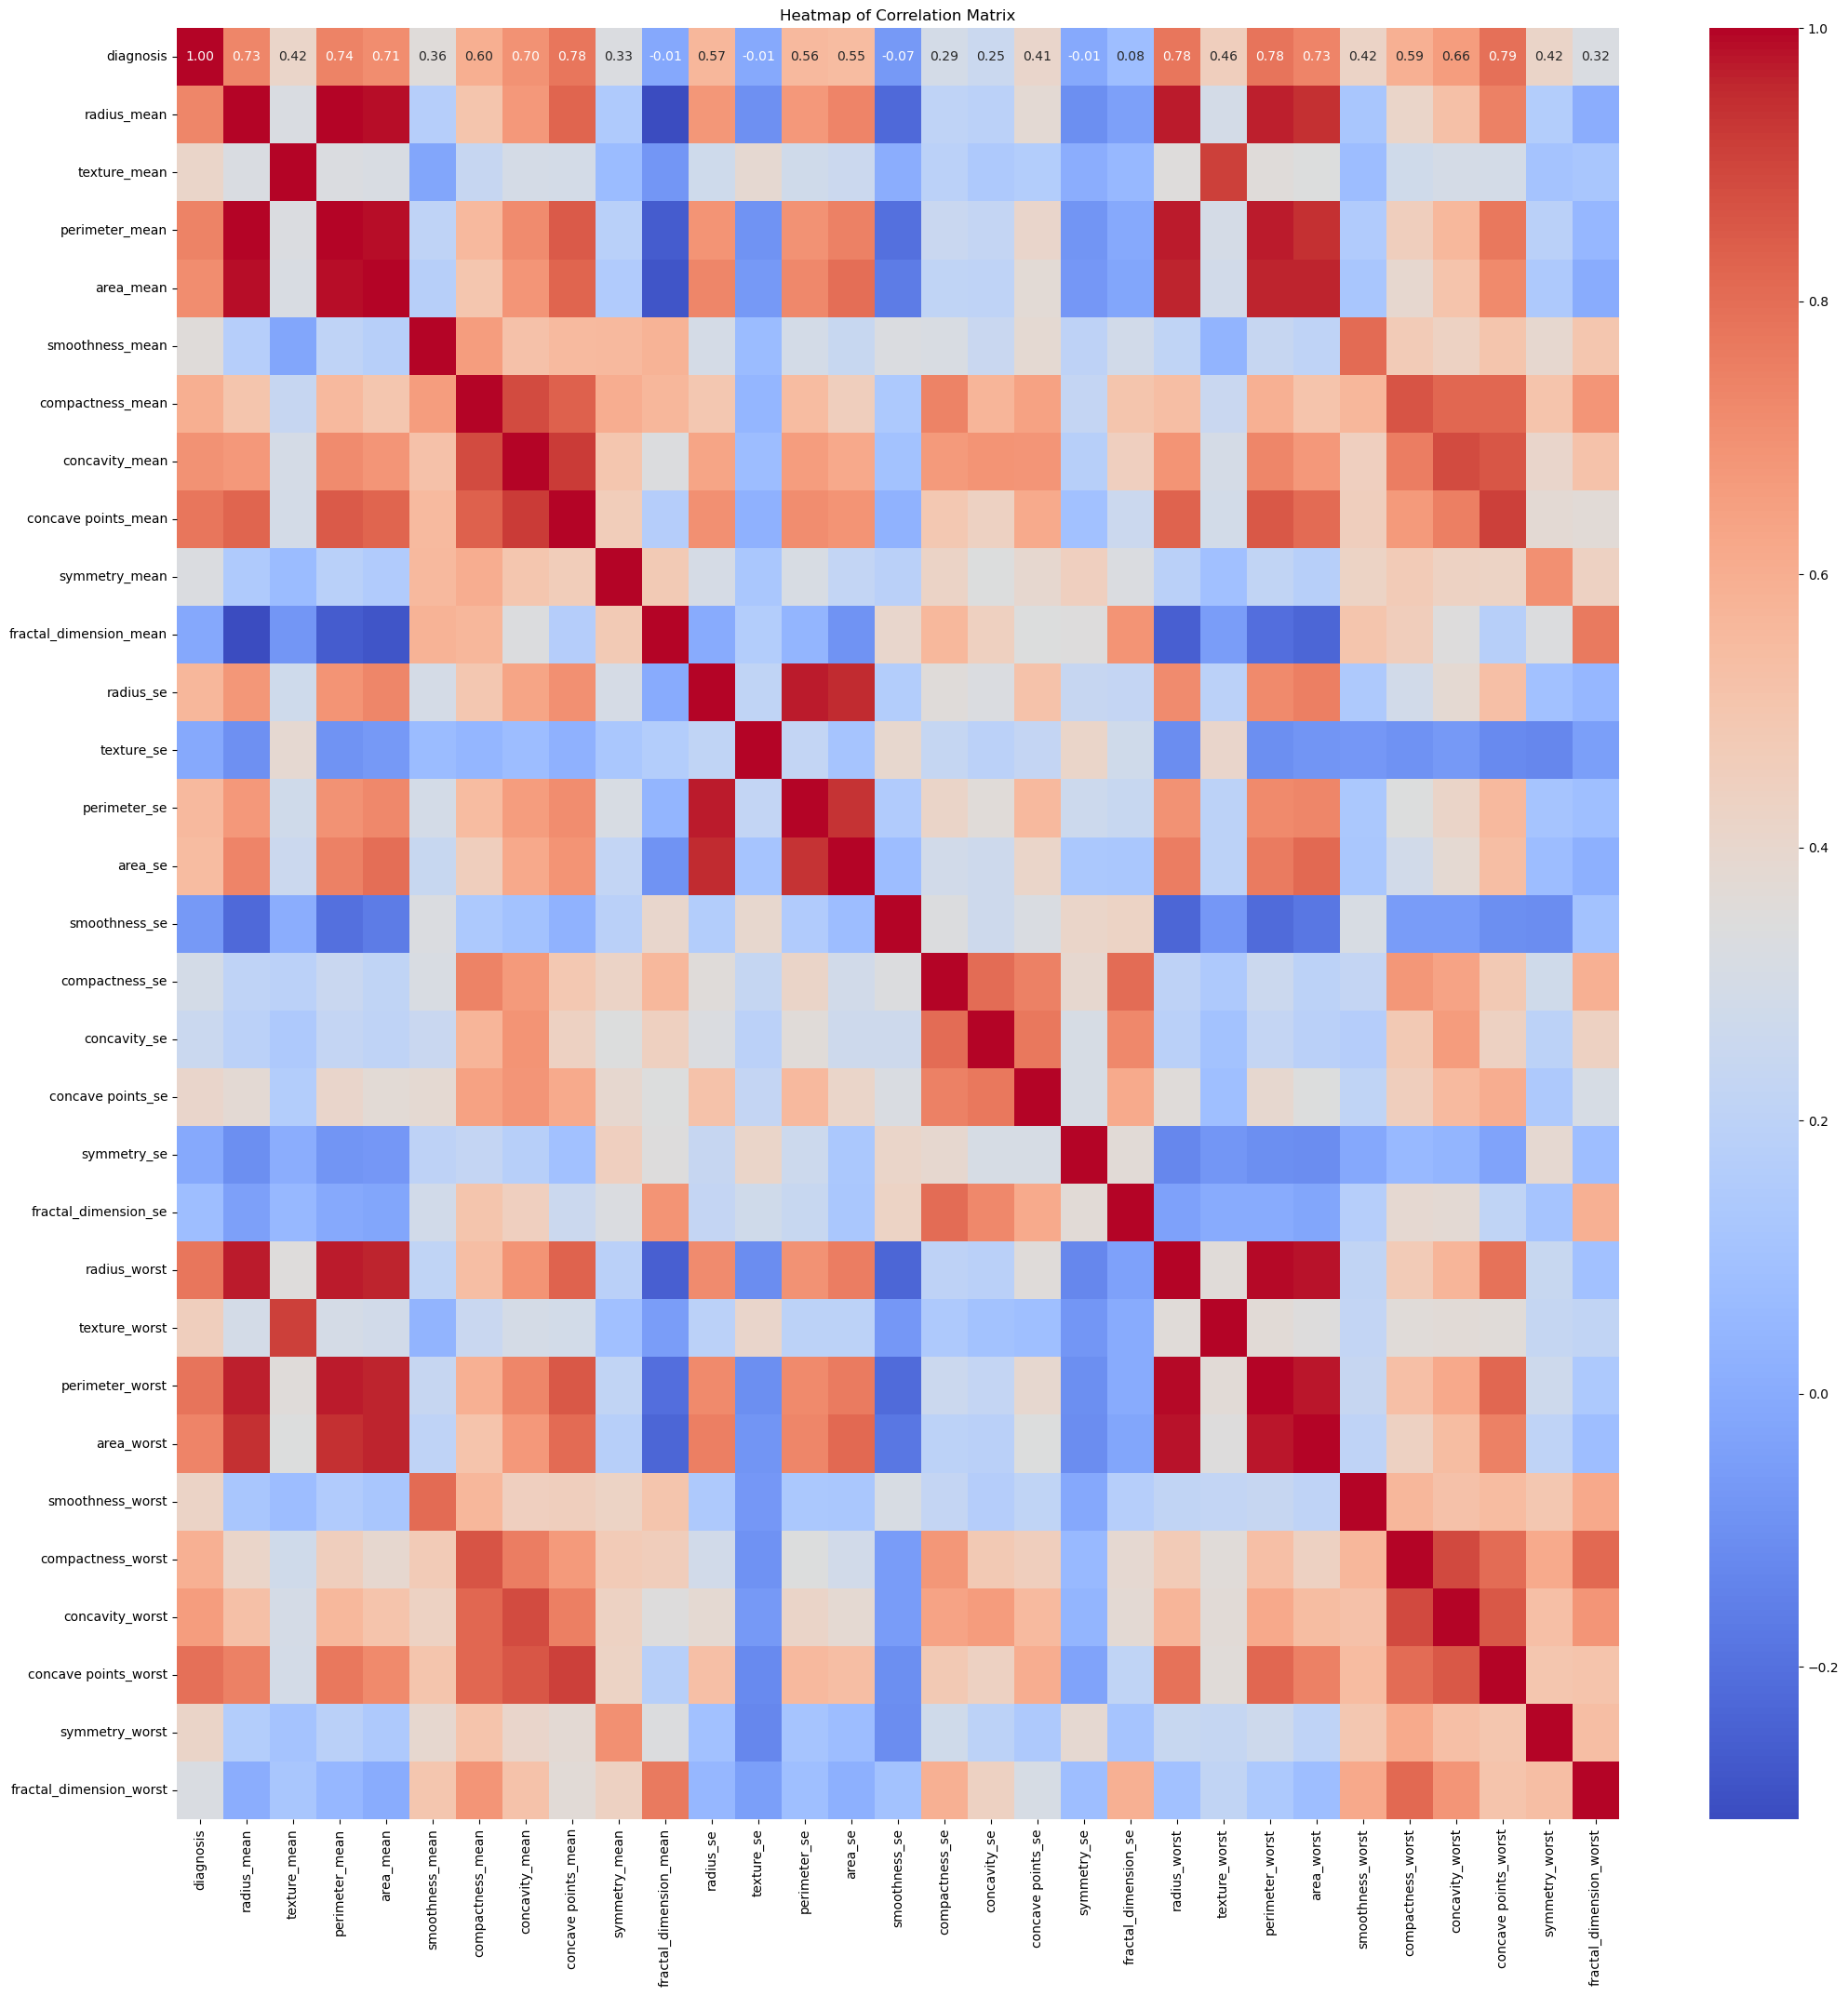

In [79]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [80]:
# Get the correlation of all features with the target variable (diagnosis)
correlation_target = correlation_matrix['diagnosis'].sort_values(ascending=False)
print(correlation_target)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [81]:
# Select features with correlation greater than 0.5 (absolute value)
relevant_features = correlation_target[abs(correlation_target) > 0.5].index
print(relevant_features)

Index(['diagnosis', 'concave points_worst', 'perimeter_worst',
       'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst',
       'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst',
       'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se',
       'area_se'],
      dtype='object')


In [82]:
from sklearn.preprocessing import StandardScaler


In [83]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[relevant_features])

In [84]:
scaled_features_df = pd.DataFrame(scaled_features, columns=relevant_features)

In [85]:
dfn= pd.concat([scaled_features_df, df['diagnosis']], axis=1)

In [86]:
dfn.head()

,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,diagnosis
0,1.297676,2.296076,2.303601,2.532475,1.886690,1.269934,2.001237,1.097064,0.984375,2.652874,2.109526,3.283515,2.616665,2.489734,2.833031,2.487578,1
1,1.297676,1.087084,1.535126,0.548144,1.805927,1.685955,1.890489,1.829821,1.908708,-0.023846,-0.146749,-0.487072,-0.430444,0.499255,0.263327,0.742402,1
2,1.297676,1.955000,1.347475,2.037231,1.511870,1.566503,1.456285,1.579888,1.558884,1.363478,0.854974,1.052926,1.082932,1.228676,0.850928,1.181336,1
3,1.297676,2.175786,-0.249939,1.451707,-0.281464,-0.592687,-0.550021,-0.768909,-0.764464,1.915897,1.989588,3.402909,3.893397,0.326373,0.286593,-0.288378,1
4,1.297676,0.729259,1.338539,1.428493,1.298575,1.776573,1.220724,1.750297,1.826229,1.371011,0.613179,0.539340,-0.313395,1.270543,1.273189,1.190357,1


In [87]:
X = dfn.loc[:, dfn.columns != 'diagnosis']

In [88]:
X

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se
0,2.296076,2.303601,2.532475,1.886690,1.269934,2.001237,1.097064,0.984375,2.652874,2.109526,3.283515,2.616665,2.489734,2.833031,2.487578
1,1.087084,1.535126,0.548144,1.805927,1.685955,1.890489,1.829821,1.908708,-0.023846,-0.146749,-0.487072,-0.430444,0.499255,0.263327,0.742402
2,1.955000,1.347475,2.037231,1.511870,1.566503,1.456285,1.579888,1.558884,1.363478,0.854974,1.052926,1.082932,1.228676,0.850928,1.181336
3,2.175786,-0.249939,1.451707,-0.281464,-0.592687,-0.550021,-0.768909,-0.764464,1.915897,1.989588,3.402909,3.893397,0.326373,0.286593,-0.288378
4,0.729259,1.338539,1.428493,1.298575,1.776573,1.220724,1.750297,1.826229,1.371011,0.613179,0.539340,-0.313395,1.270543,1.273189,1.190357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.629151,1.752563,2.320965,1.901185,2.060786,2.015301,2.110995,2.343856,1.947285,0.664512,0.219060,-0.273318,2.782080,2.379583,2.604187
565,0.733827,1.421940,1.263669,1.536720,1.615931,1.494959,1.704854,1.723842,0.693043,0.236573,-0.017833,-0.394820,1.300499,1.156857,1.291565
566,0.414069,0.579001,0.105777,0.561361,0.672676,0.427906,0.702284,0.577953,0.046588,0.326767,-0.038680,0.350735,0.184892,0.276693,0.180698
567,2.289985,2.303601,2.658866,1.961239,1.982524,1.653171,1.838341,1.735218,3.296944,3.197605,3.272144,3.904848,1.157935,1.438530,1.009503


In [89]:
y=df.loc[:,"diagnosis"]
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (455, 15)
X_test shape: (114, 15)
y_train shape: (455,)
y_test shape: (114,)


In [93]:
from sklearn import svm
from sklearn.svm import LinearSVC

In [94]:
svm_model = SVC(kernel='linear', random_state=42)

In [95]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [96]:
train_predictions = svm_model.predict(X_train)

In [97]:
test_predictions = svm_model.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score,f1_score

In [99]:
train_conf_matrix = confusion_matrix(y_train, train_predictions)
train_accuracy = accuracy_score(y_train, train_predictions)
train_f1_class_1 = f1_score(y_train, train_predictions, pos_label=1)
train_f1_class_0 = f1_score(y_train, train_predictions, pos_label=0)

In [100]:
test_conf_matrix = confusion_matrix(y_test, test_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1_class_1 = f1_score(y_test, test_predictions, pos_label=1)
test_f1_class_0 = f1_score(y_test, test_predictions, pos_label=0)


In [103]:
print("TRAIN Confusion Matrix:\n", train_conf_matrix)
print("\nTRAIN Data Accuracy:", train_accuracy)
print("\nTrain Data F1-Score for class '1':", train_f1_class_1)
print("Train Data F1-Score for class '0':", train_f1_class_0)

TRAIN Confusion Matrix:
 [[280   6]
 [ 14 155]]

TRAIN Data Accuracy: 0.9560439560439561

Train Data F1-Score for class '1': 0.9393939393939393
Train Data F1-Score for class '0': 0.9655172413793104


In [102]:
print("TEST Confusion Matrix:\n", test_conf_matrix)
print("\nTEST Data Accuracy:", test_accuracy)
print("\nTest Data F1-Score for class '1':", test_f1_class_1)
print("Test Data F1-Score for class '0':", test_f1_class_0)

TEST Confusion Matrix:
 [[70  1]
 [ 2 41]]

TEST Data Accuracy: 0.9736842105263158

Test Data F1-Score for class '1': 0.9647058823529412
Test Data F1-Score for class '0': 0.979020979020979


In [104]:
import pickle

In [106]:
model_filename = 'svm_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(svm_model, file)

print(f"Model saved as {model_filename}")

Model saved as svm_model.pkl
